# Python Foundations Project: Austo



## Problem Statement

### Context

In the 21st century, cars are an important mode of transportation that provides us the opportunity for personal control and autonomy. In day-to-day life, people use cars for commuting to work, shopping, visiting family and friends, etc. Research shows that more than 76% of people prevent themselves from traveling somewhere if they don't have a car. Most people tend to buy different types of cars based on their day-to-day necessities and preferences. So, it is essential for automobile companies to analyze the preference of their customers before launching a car model into the market. Austo, a UK-based automobile company aspires to grow its business into the US market after successfully establishing its footprints in the European market.

In order to be familiar with the types of cars preferred by the customers and factors influencing the car purchase behavior in the US market, Austo has contracted a consulting firm. Based on various market surveys, the consulting firm has created a dataset of 3 major types of cars that are extensively used across the US market. They have collected various details of the car owners which can be analyzed to understand the automobile market of the US.

### Objective

Austo's management team wants to understand the demand of the buyers and trends in the US market. They want to build customer profiles based on the analysis to identify new purchase opportunities so that they can manipulate the business strategy and production to meet certain demand levels. Further, the analysis will be a good way for management to understand the dynamics of a new market. Suppose you are a Data Scientist working at the consulting firm that has been contracted by Austo. You are given the task to create buyer's profiles for different types of cars with the available data as well as a set of recommendations for Austo. Perform the data analysis to generate useful insights that will help the automobile company to grow its business.

### Data Description

austo_automobile.csv: The dataset contains buyer's data corresponding to different types of products(cars).

### Data Dictionary

* Age: Age of the customer
* Gender: Gender of the customer
* Profession: Indicates whether the customer is a salaried or business person
* Marital_status: Marital status of the customer
* Education: Refers to the highest level of education completed by the customer
* No_of_dependents: Number of dependents(partner/children/spouse) of the customer
* Personal_loan: Indicates whether the customer availed a personal loan or not
* House_loan: Indicates whether the customer availed house loan or not
* Partner_working: Indicates whether the customer's partner is working or not
* Salary: Annual Salary of the customer
* Partner_salary: Annual Salary of the customer's partner
* Total_salary: Annual household income (Salary + Partner_salary) of the customer's family
* Price: Price of the car
* Make: Car type (Hatchback/Sedan/SUV)

## Importing necessary libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# to display values uptp 2 decimal places
pd.set_option('display.float_format', lambda x : '%.2f' % x)

## Importing the dataset

In [2]:
# read the data
data = pd.read_csv('austo_automobile.csv')

# make a copy of the data
df = data.copy()

# returns the first 5 rows
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,24,Male,Salaried,Married,Post Graduate,4,No,Yes,Yes,52000,25000,77000,18000,Hatchback
1,28,Male,Salaried,Married,Post Graduate,3,No,Yes,No,68000,0,68000,18000,Hatchback
2,23,Male,Salaried,Married,Graduate,4,Yes,Yes,No,31000,0,31000,18000,Hatchback
3,26,Male,Business,Married,Post Graduate,4,Yes,Yes,Yes,66000,35000,101000,18000,Hatchback
4,28,Male,Business,Married,Post Graduate,4,Yes,No,No,64000,0,64000,18000,Hatchback


In [3]:
# returns the last 5 rows 
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,28,Male,Salaried,Married,Post Graduate,2,Yes,No,No,72000,0,72000,33000,Hatchback
1577,23,Male,Salaried,Single,Graduate,2,Yes,Yes,No,37000,0,37000,33000,Hatchback
1578,23,Male,Business,Married,Graduate,4,Yes,Yes,Yes,38000,28000,66000,33000,Hatchback
1579,25,Male,Business,Married,Post Graduate,3,Yes,Yes,Yes,58000,40000,98000,33000,Hatchback
1580,28,Male,Salaried,Married,Graduate,4,No,Yes,Yes,54000,40000,94000,33000,Hatchback


## Data Overview

#### Question 1: How many rows and columns are present in the data? [0.5 mark]

In [4]:
# the number of rows and columns
print('There are',df.shape[0], 'rows and',df.shape[1],'columns in the data')

There are 1581 rows and 14 columns in the data


#### Observations:

There are 1581 rows and 14 columns in the dataset.


#### Question 2: What are the datatypes of the different columns in the dataset? [0.5 mark]

In [5]:
# check the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1581 non-null   int64 
 1   Gender            1581 non-null   object
 2   Profession        1581 non-null   object
 3   Marital_status    1581 non-null   object
 4   Education         1581 non-null   object
 5   No_of_Dependents  1581 non-null   int64 
 6   Personal_loan     1581 non-null   object
 7   House_loan        1581 non-null   object
 8   Partner_working   1581 non-null   object
 9   Salary            1581 non-null   int64 
 10  Partner_salary    1581 non-null   int64 
 11  Total_salary      1581 non-null   int64 
 12  Price             1581 non-null   int64 
 13  Make              1581 non-null   object
dtypes: int64(6), object(8)
memory usage: 173.0+ KB


#### Observations:

- There are 6 numerical data types and 8 object data types in the dataset.

#### Question 3: Check the statistical summary of the data. What is the minimu, avergae, and maximum Price of the cars? [2 marks]

In [66]:
# check the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.00,32.21,9.13,22.00,25.00,29.00,38.00,60.00
No_of_Dependents,1581.00,2.46,0.94,0.00,2.00,2.00,3.00,4.00
Salary,1581.00,59732.45,14278.64,30000.00,51000.00,59000.00,71000.00,90000.00
Partner_salary,1581.00,19720.43,19480.21,0.00,0.00,25000.00,38000.00,80000.00
Total_salary,1581.00,79452.88,24855.94,30000.00,61000.00,78000.00,96000.00,158000.00
Price,1581.00,35597.72,13633.64,18000.00,25000.00,31000.00,47000.00,70000.00


#### Observations:

`Age:`The average age is 32,it ranges from 22 to 60. There is a difference between the 75th percentile and the maximum age which indicates the prescence of outliers.

`No_of_Dependents:`Minimum number of dependents is 0 and the maximum number of dependdent is 4.

`Salary:` The average salary is 59732, while the minimum salary is 30000 and maximum salary is 90000. 75% of the car owners have salaries less or equal to 71000

`Partner_salary:` The average partner salary is 19720. The salary ranges from 0 to 80000. There is a huge difference between the 75th percentile and the maximum amount which indicates the prescence of outliers . 50% of the partners earn very low salaries (below 25000).

`Total_salary:` The average total salary is 79452. The total salary ranges from 30000 to 158000.

`Price:`The average car price is 35597. The minimum car price is 18000 and maximum car price is 70000.



#### Question 4: Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [7]:

# check for missing values
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

#### Observations:
- There are no missing values in the data

#### Question 5: How many cars are there of type SUV? [1 mark]

In [8]:
# number of cars of type SUV
print('There are', df[df['Make']=='SUV'].shape[0], 'cars of the type SUV')

There are 237 cars of the type SUV


#### Observations:

There are 237 cars of the type SUV.


## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [10 marks]

##### Observations on Age

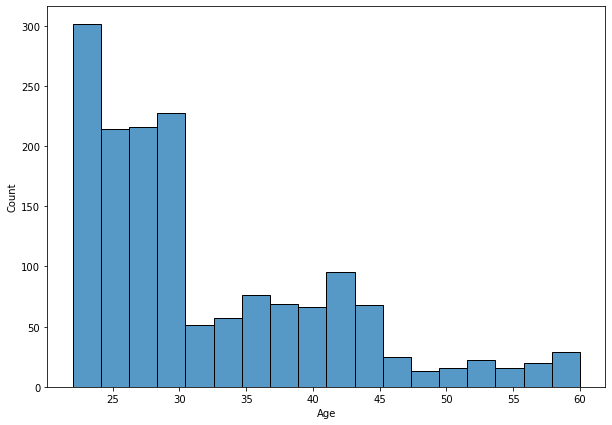

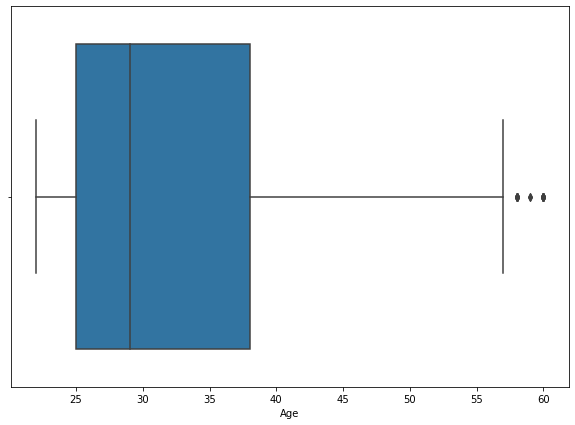

In [9]:
# Histogram boxplot for the Age
plt.figure(figsize=(10,7))
sns.histplot(data=df,x='Age')
plt.show()

plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='Age')
plt.show()


- The Age distribution is skewed to the right.
- There are few outliers in the column
- Majority of car owners are between the ages of 22 and 31
- 75% of the car owners are less than 40 years


##### Observations on Gender

In [10]:
# code to find out unique Gender type
print(df['Gender'].unique())



print(df['Gender'].value_counts(normalize=True))

['Male' 'Female']
Male     0.79
Female   0.21
Name: Gender, dtype: float64


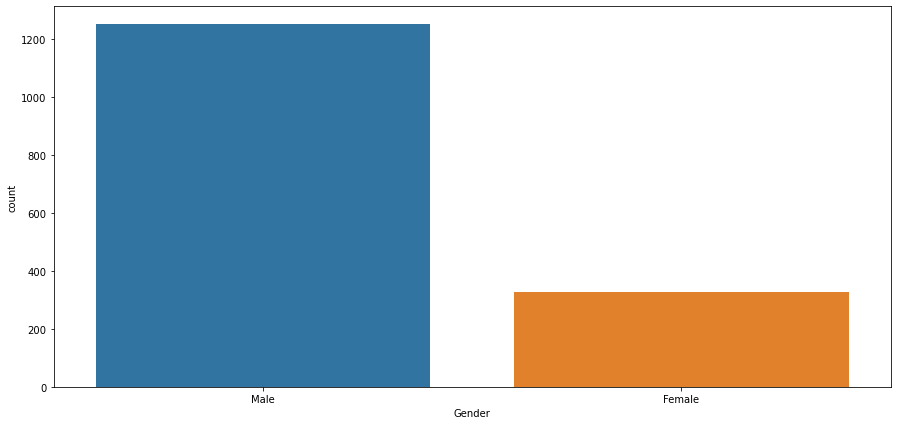

In [11]:
# code to plot Gender column
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='Gender')
plt.show()

- About 80% of car owners are males while 20% are females

##### Observations on Profession

In [12]:
# code to check unique profession types
print(df['Profession'].unique())

# code to get the percentages of each profession
df['Profession'].value_counts(normalize=True)

['Salaried' 'Business']


Salaried   0.57
Business   0.43
Name: Profession, dtype: float64

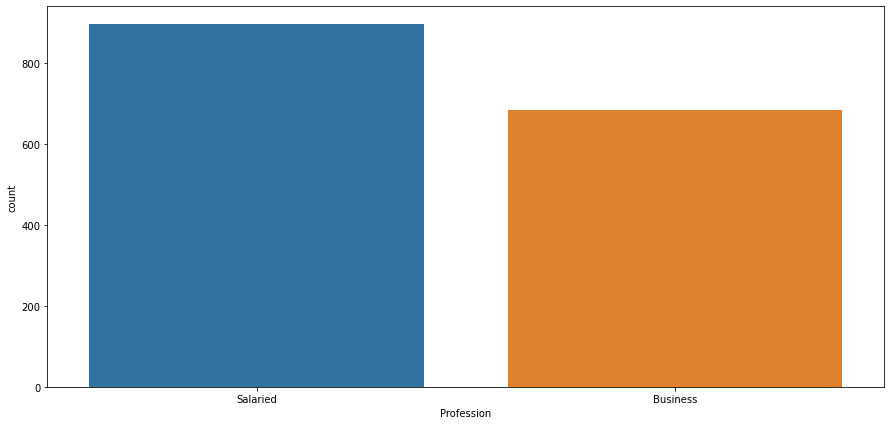

In [13]:
# code to plot Profession column
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='Profession')
plt.show()

- 57% of car owners are salary earners while the 43% are business owners

##### Observations on Marital status

In [14]:
# check unique values
print(df['Marital_status'].unique())

# code to get the percentages of the unique values in the column
print(df['Marital_status'].value_counts(normalize=True))

['Married' 'Single']
Married   0.91
Single    0.09
Name: Marital_status, dtype: float64


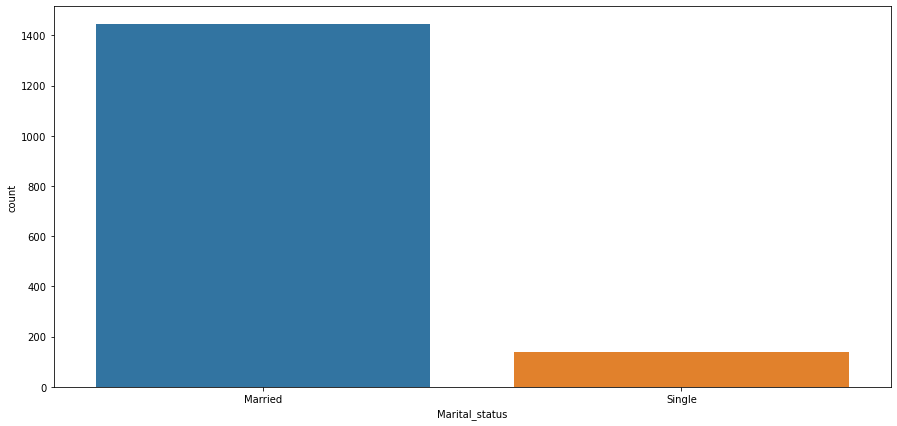

In [15]:
# code to plot Marital_status column
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='Marital_status')
plt.show()

- 91% of car owners are married while 9% are single

##### Observations on Education

In [16]:
# code to check unique values
print(df['Education'].unique())

# code to get the percentages of the unique values in the column
print(df['Education'].value_counts(normalize=True))

['Post Graduate' 'Graduate']
Post Graduate   0.62
Graduate        0.38
Name: Education, dtype: float64


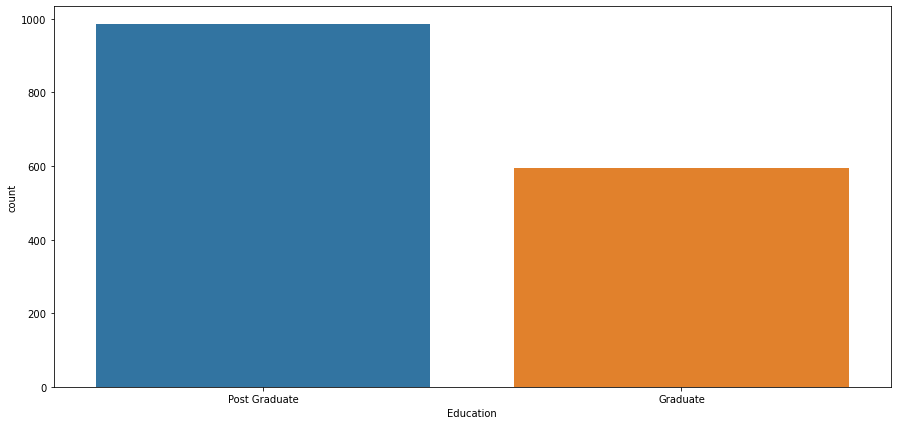

In [17]:
# code to plot Education column
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='Education')
plt.show()

-Majority of the car owners (62%) are post graduates degree holders while 38% are graduates 

##### Observations on Number of Dependents

In [18]:
# code to check unique values
df['No_of_Dependents'].unique()


array([4, 3, 0, 2, 1], dtype=int64)

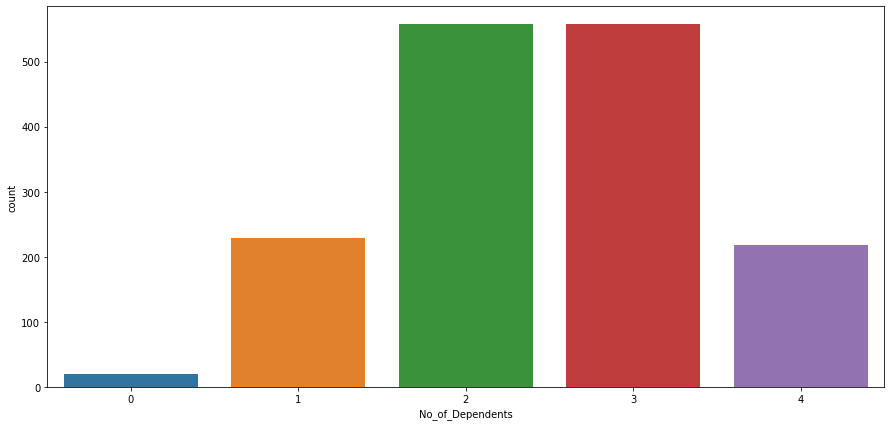

In [19]:
# code to plot No_of_dependents column
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='No_of_Dependents')
plt.show()

- Majority of car owners have 2 or 3 dependents
- Very few car owners have no dependents

##### Observations on Personal loan 

In [20]:
# check unique values
df['Personal_loan'].unique()


array(['No', 'Yes'], dtype=object)

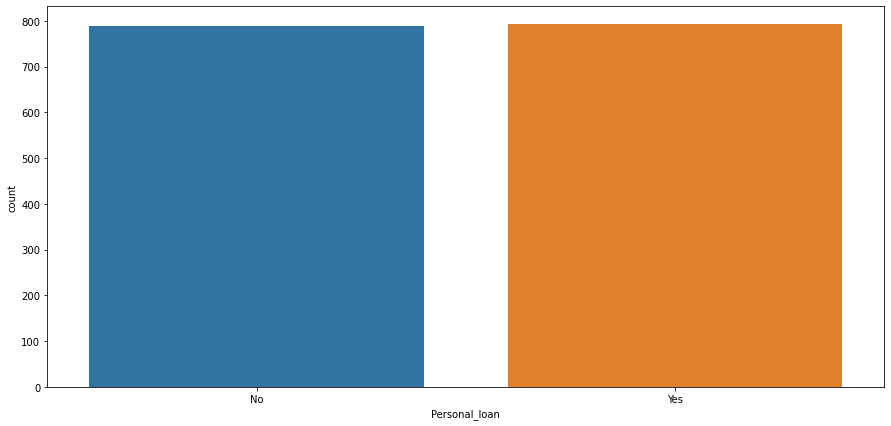

In [21]:
# code to plot Personal_loan column
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='Personal_loan')
plt.show()

The count of car owners who took Personal loan is extremely close to the count of car owners who did not take Personal loan.

##### Observations on House Loan

In [22]:
# check unique values
df['House_loan'].unique()

array(['Yes', 'No'], dtype=object)

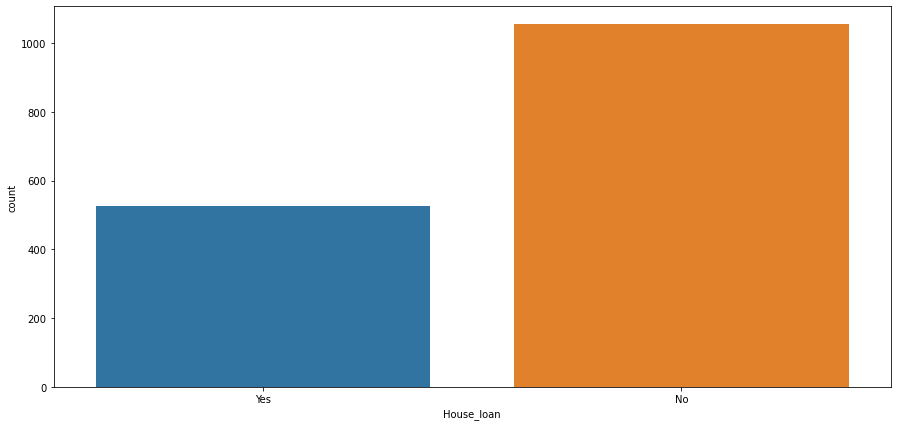

In [23]:
# code to plot House loan columm
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='House_loan')
plt.show()

- About 67% of car owners do not have House loan while 33% have House loan .

##### Observations on Partner working

In [24]:
# check unique values
df['Partner_working'].unique()

array(['Yes', 'No'], dtype=object)

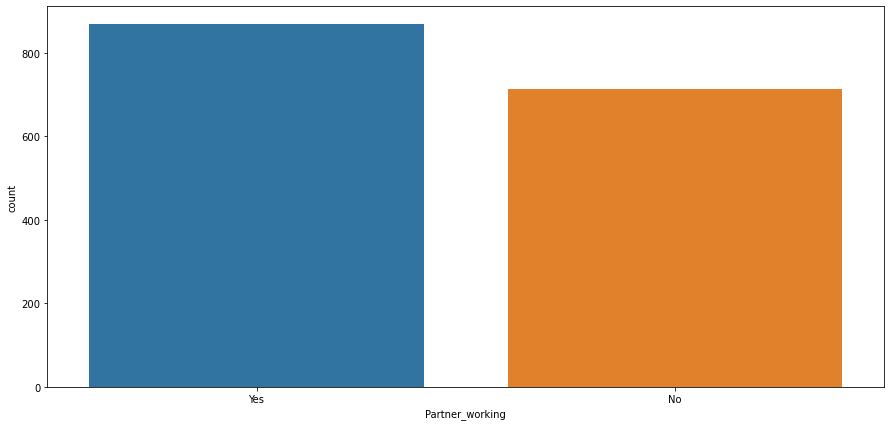

In [25]:
# code to plot partner working column
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='Partner_working')
plt.show()

- 55% of partners are working while 45% are not working

##### Observations on Salary

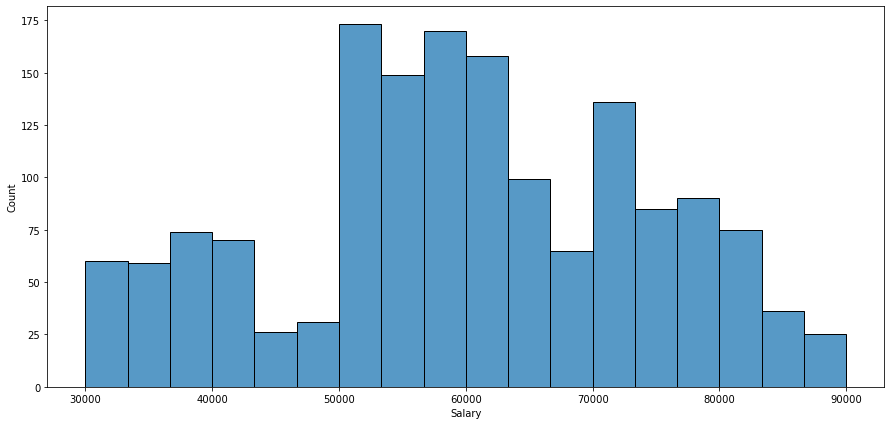

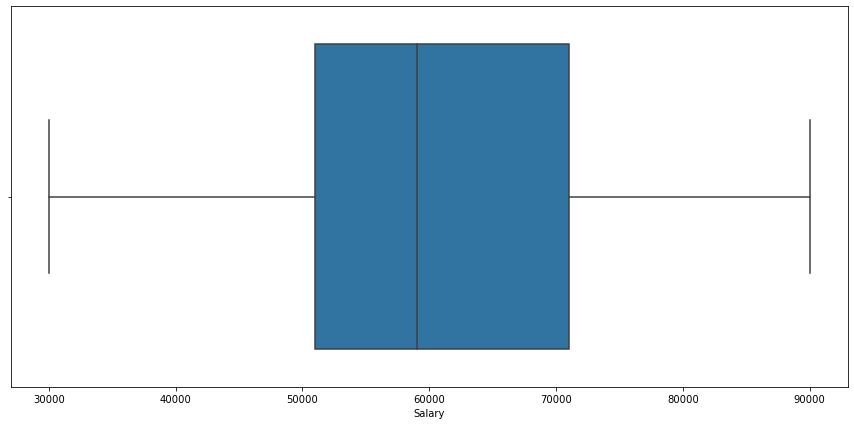

In [26]:
plt.figure(figsize=(15,7))
sns.histplot(data=df,x='Salary')
plt.show()

plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='Salary')
plt.show()

- Majority of car owners have salary between the range 50000 and 71000
- The distribution is almost symmetrical as the mean is extremely close to the median.
- There are no outliers in this column

##### Observations on Partner Salary

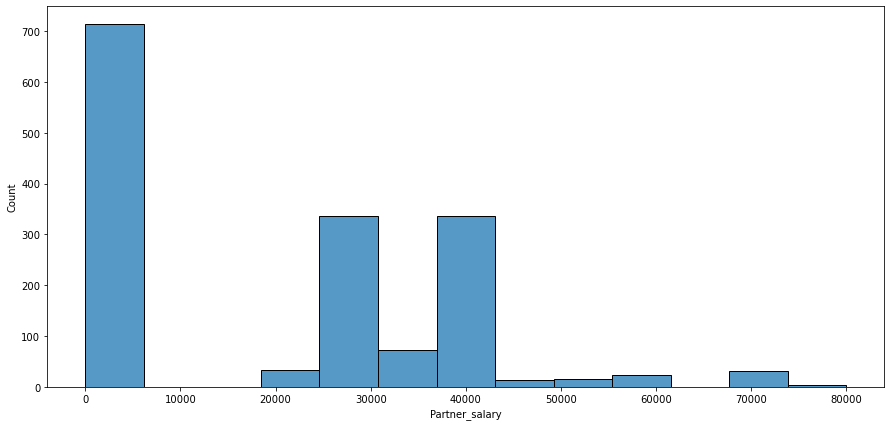

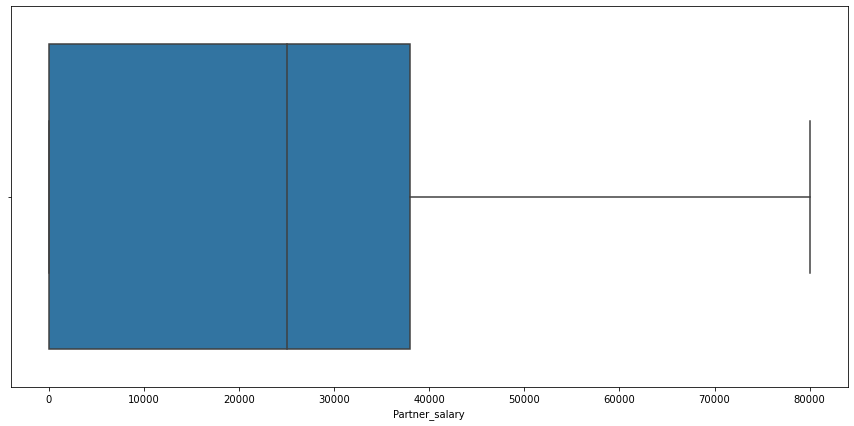

In [27]:
plt.figure(figsize=(15,7))
sns.histplot(data=df,x='Partner_salary')
plt.show()


plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='Partner_salary')
plt.show()

- The distribution is right skewed 
- Majority of the Partners have no salary


##### Observations on Total Salary

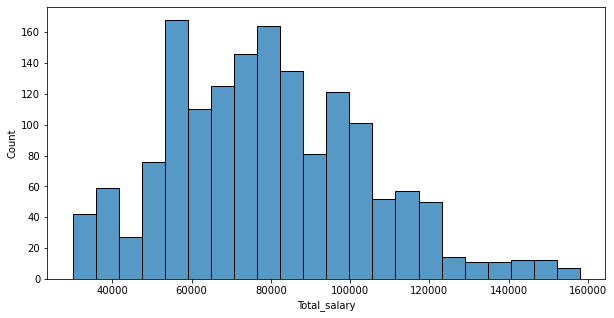

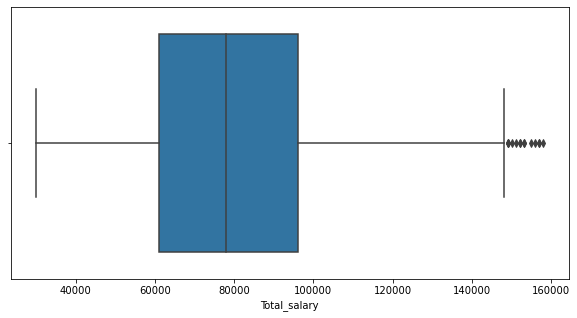

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='Total_salary')
plt.show()


plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='Total_salary')
plt.show()

- The distribution is skewed to the right
- There are outliers present inthis column
- 50% of the data have less than 78000 as total salary

##### Observations on Price

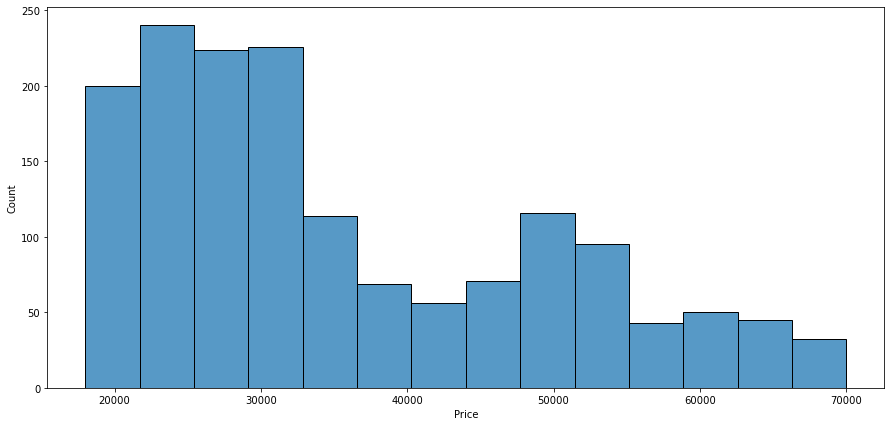

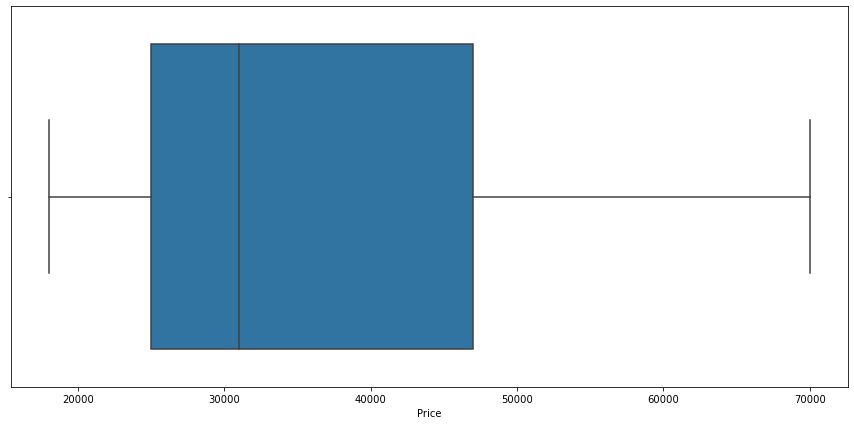

In [29]:
plt.figure(figsize=(15,7))
sns.histplot(data=df,x='Price')
plt.show()


plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='Price')
plt.show()

- The distribution is skewed to the right
- 50% of car prices are below 31000
- There are no outliers present in this column

##### Make

In [30]:
# check unique values
df['Make'].unique()

array(['Hatchback', 'SUV', 'Sedan'], dtype=object)

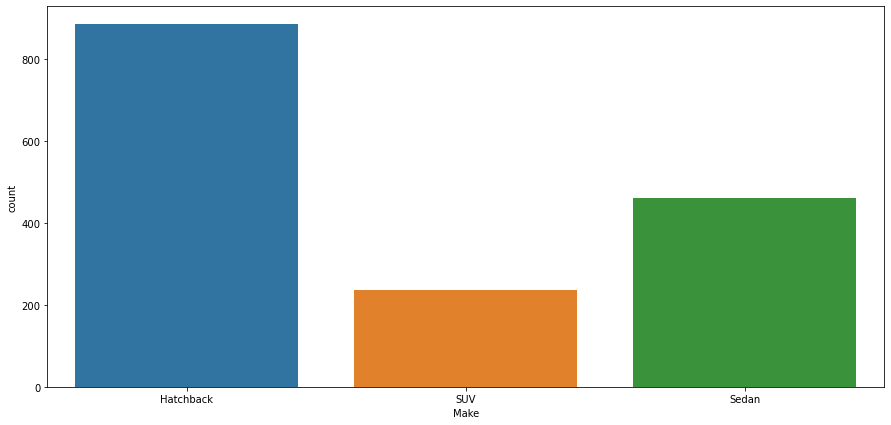

In [31]:
# code to plot the Make column
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='Make')
plt.show()

- Hatchback is the most preferred car type
- SUV is the least preferred car type

#### Question 7: How many cars are of make Hatchback and priced above 25000. State your observations? [2 marks]

In [32]:
# dataframe of hatchback cars
hatch_cars = df[df['Make']=='Hatchback']

cars_above= hatch_cars[hatch_cars['Price']>25000]

print('There are', cars_above.shape[0],'cars of make Hatchback and above 25000')

There are 444 cars of make Hatchback and above 25000


#### Observations:
There are 444 Hatchback cars that are priced above 25000

#### Question 8: How many owners have bought cars that were priced higher than their salary. How many of them have taken personal loan? [3 marks]

In [33]:
filtered_data= df[(df['Price']) > (df['Salary'])]
#count the numbers of such owners
count_owners = filtered_data.shape[0]
print(f"Number of owners who bought cars priced higher than their salary: {count_owners}")

# Count how many of these owners have taken a personal loan
num_owners_with_loan = filtered_data[filtered_data['Personal_loan'] == 'Yes'].shape[0]
print(f"Number of owners who bought cars priced higher than their salary and took a personal loan: {num_owners_with_loan}")

Number of owners who bought cars priced higher than their salary: 96
Number of owners who bought cars priced higher than their salary and took a personal loan: 44


#### Observations:
There are 96 owners who bought cars priced higher than their salary
There are 44 owners who bought cars priced higher than their salry and took a personal loan 

### Multivariate Analysis

#### Question 9: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [15 marks]

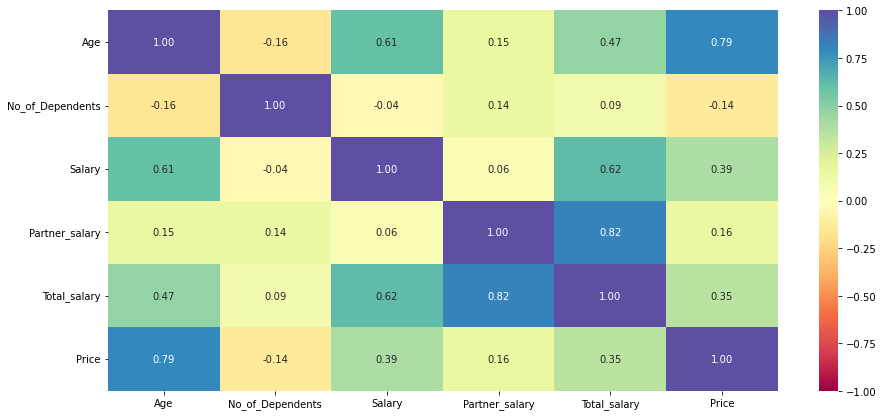

In [34]:
# plot the heatmap to find the correlation between the numerical values
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt ='.2f',cmap='Spectral')
plt.show()

- There is a strong positive relationship between Total_salary and Partner_salary
- There is a strong positive relationship between Price and Age
- There is strong positve correlation between Salary and Total_salary
- There is a negative correlation between Salary and No_of_Dependents

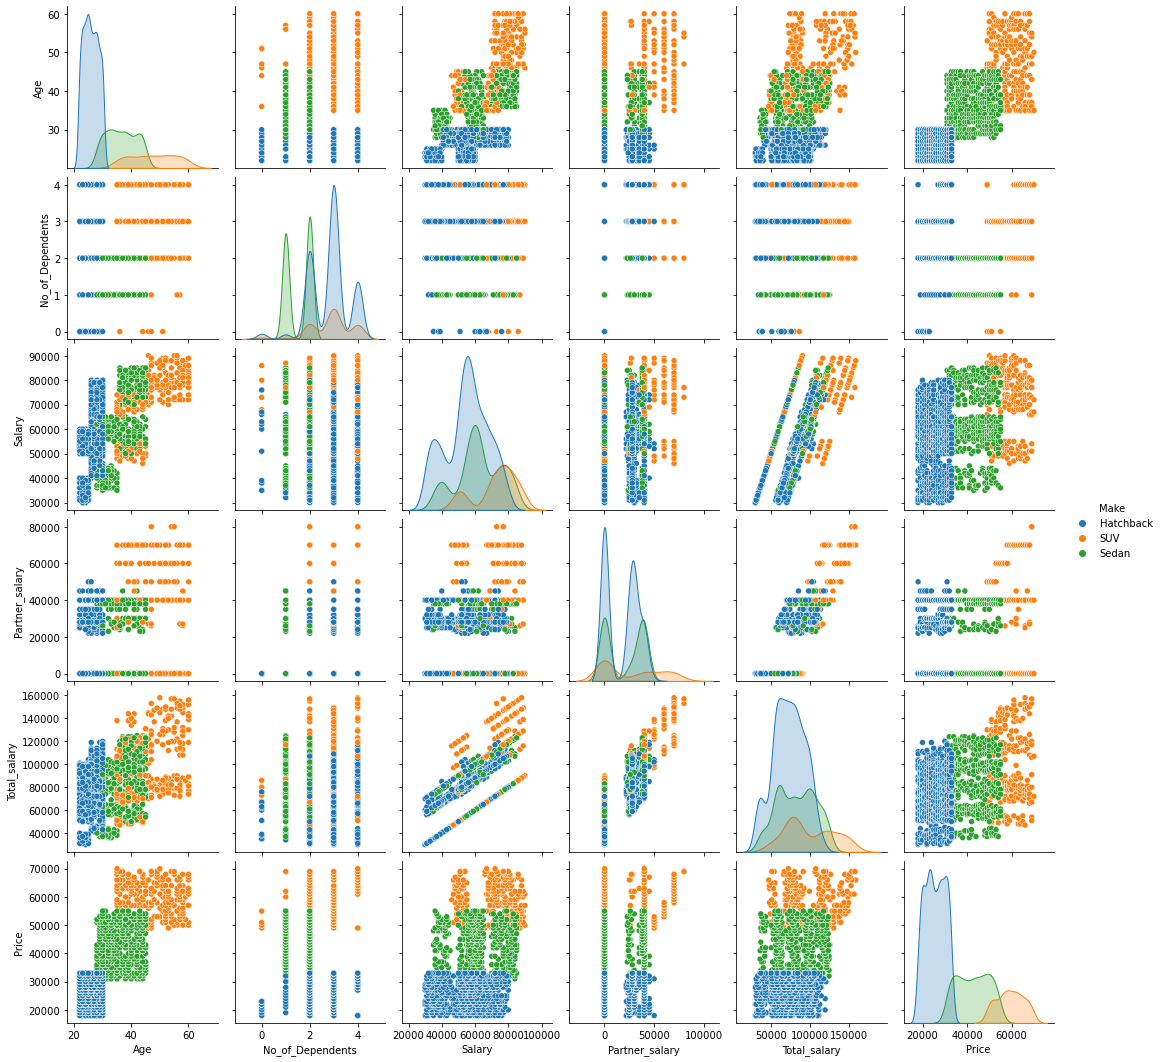

In [35]:
# pairplot to show the relationship between numerical variables and hue Make
sns.pairplot(data =df, hue = "Make", diag_kind = "kde")
plt.show()

- There is positive correlation between Age and Price ,Partner_salary and Total_salary, Age and Total_salary

##### Make vs Age

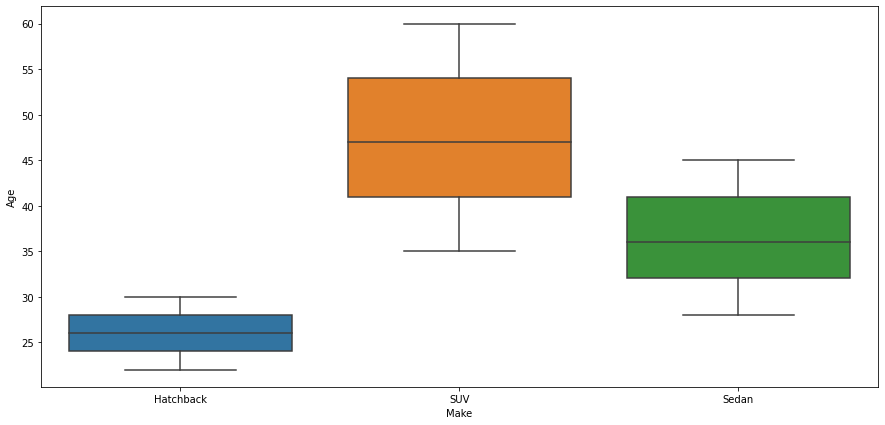

In [36]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='Make',y='Age')
plt.show()

- Hatchback has a median age of around 26, with a very short IQR, suggesting less variability in the age of its buyers
- Sedan has a median age of around 36, with a short IQR, indicating a wide range of ages.
- SUV has a median age of around 47, with a relatively tall box, indicating a wider age range with several buyers significantly older than the rest.


##### Make vs Price

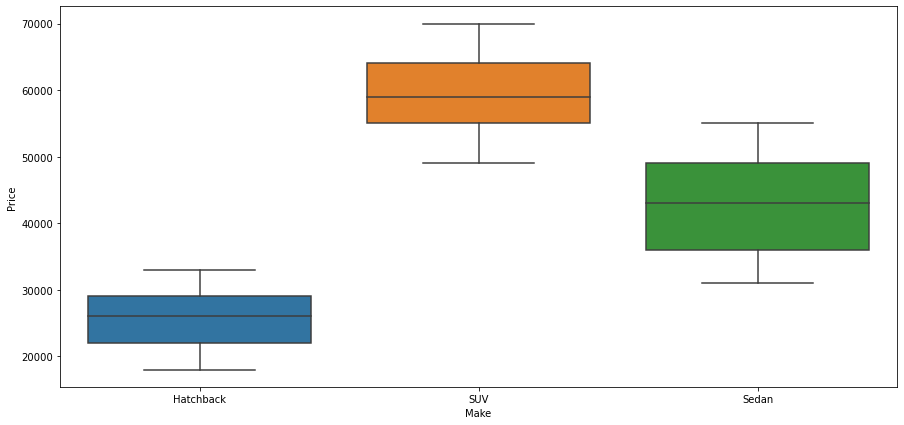

In [37]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='Make',y='Price')
plt.show()

- Suv has the highest median of around 60000, indicating that SUV cars are more expensive than Hatchback and Sedan
- Hatchback has the lowest median of around 27000 and less variability in the prices, suggesting that Hatchback cars are less expensive than Sedan and SUV

##### Make vs Salary

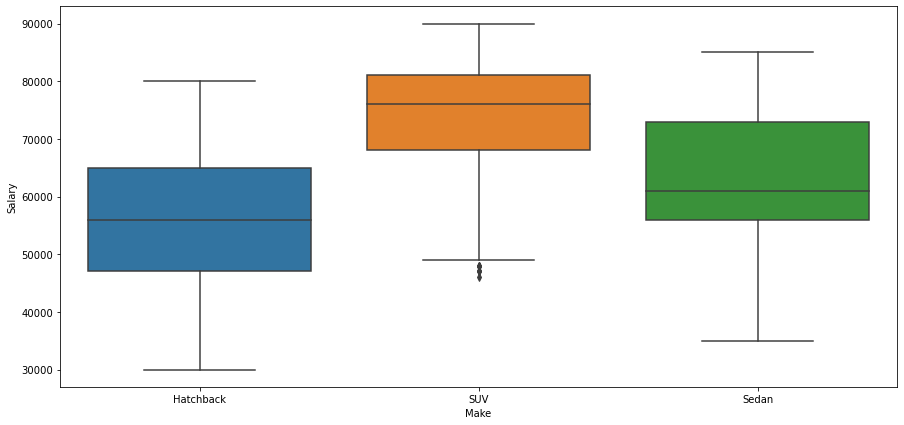

In [38]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='Make',y='Salary')
plt.show()

- The median salary of owners of Hatchback is around 57000, which is the lowest and it has a wide range of variability in the salaries of the owners.
- SUV has the highest median salary of around 77000, indicating that owners of SUV car type have high salaries. There are also outliers in the lower end .

##### Make vs Education

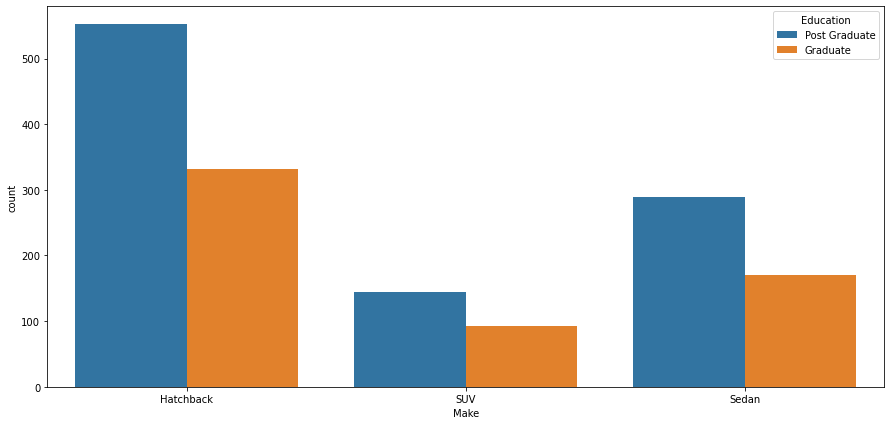

In [39]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='Make',hue='Education')
plt.show()

- Hatchback car type has the highest count of both post graduates and graduates
- Car owners with SUV have lowest number of post graduates and graduates

##### Make vs Number of Dependents

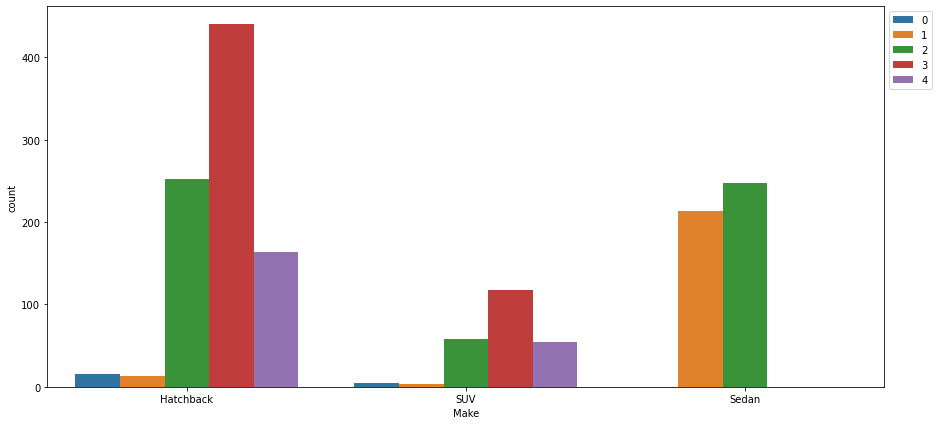

In [40]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='Make',hue='No_of_Dependents')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- Hatchback owners have the highest numbers of dependents across the number of dependents category .

##### Make vs Profession

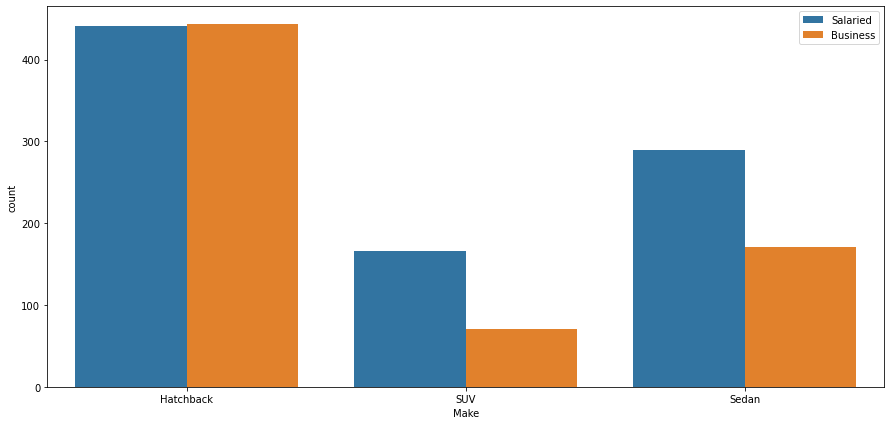

In [41]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='Make',hue='Profession')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- Owners of Hatchback cars have the highest number of salary earners and business owners
- SUV owners have the least count of salary earners and business owners

##### Make vs Personal loan

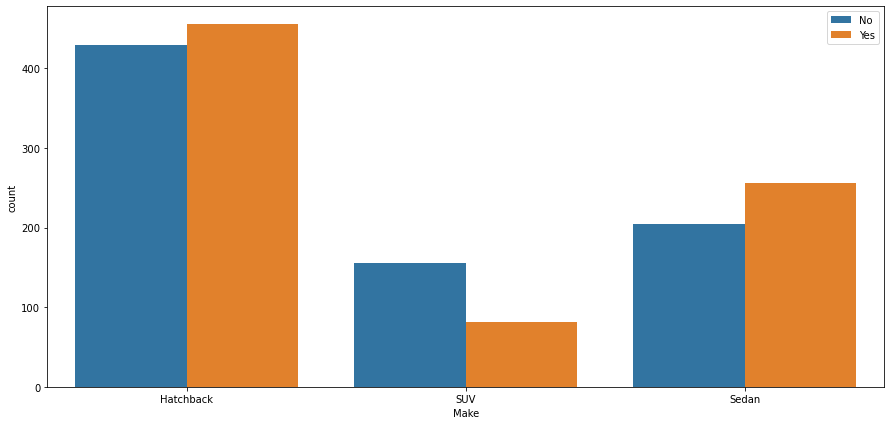

In [42]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='Make',hue='Personal_loan')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- Hatchback car type has the highest count of owners who took personal loan and those who didn't take personal loan
- SUV car type has the least number of owners who took personal loan and those who didn't take personal loan


##### Make vs House loan

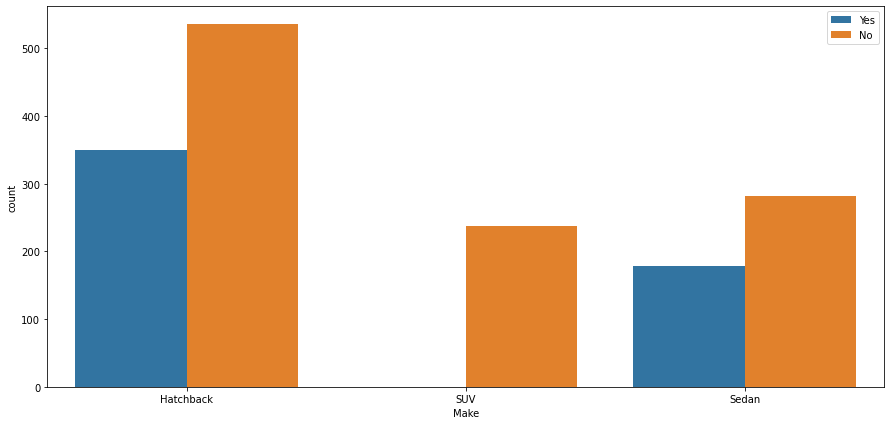

In [43]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='Make',hue='House_loan')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- The number of car owners who did not take House loan is much greater than the number of owners who took House loan
- Hatchback car type has the highest count of owners who took House loan and those who didn't take the loan.

##### Grouping according to Car types to build customer profiles

##### Grouping data with respect to Hatchback

In [44]:
df[df['Make']=='Hatchback'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,884.00,NaN,NaN,NaN,25.87,2.52,22.00,24.00,26.00,28.00,30.00
Gender,884,2,Male,869,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,884,2,Business,443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,884,2,Married,800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,884,2,Post Graduate,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,884.00,NaN,NaN,NaN,2.82,0.81,0.00,2.00,3.00,3.00,4.00
Personal_loan,884,2,Yes,455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,884,2,No,535,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,884,2,Yes,497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,884.00,NaN,NaN,NaN,54969.46,12798.74,30000.00,47000.00,56000.00,65000.00,80000.00


- The average age for Hatchback owners is 26 years.
- The age ranges from 22 years to 30 years
- 98% of Hatchback owners are Males. 
- Majority of Hatchback owners are Business owners and Married.
- 62% of Hatchback owners are Post Graduate degree holders.
- 51% of Hatchback owners took Personal loan
- 61% of Hatchback owners did not apply for House loan
- Majority of Hatchback owners have partners that are working
- The average salary of Hatchback owners is 54969. The salary ranges from 30000 to 80000
- The average partner's salary is 17707. The salary ranges from 0 to 50000, indicating a low variability
- The average Total salary is 72676. The total salary ranges from 30000 to 120000
- The average price of Hatchback cars is 25561. The minimum hatchback price is 18000 and the maximum hatchback price is 33000
- There are 884 Hatchback cars


In [45]:
df[df['Make']=='SUV'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,237.00,NaN,NaN,NaN,47.60,7.73,35.00,41.00,47.00,54.00,60.00
Gender,237,2,Male,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,237,2,Salaried,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,237,2,Married,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,237,2,Post Graduate,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,237.00,NaN,NaN,NaN,2.89,0.84,0.00,2.00,3.00,3.00,4.00
Personal_loan,237,2,No,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,237,1,No,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,237,2,Yes,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,237.00,NaN,NaN,NaN,72683.54,12165.05,46000.00,68000.00,76000.00,81000.00,90000.00


- The average age is 48 years. The age range in this category is between 35 years and 60 years
- 52% of SUV car owners are Males
- 70% of SUV owners are salary earners
- Majority of SUV owners are Married
- 60% of SUV owners are Post Graduate degree holders
- Majority of SUV owners do not have Personal loan and House loan
- 50% of SUV owners have partners working
- The average salary of SUV owners are 72684. The salary of SUV owners ranges from 46000 to 90000
- The average partner's salary is 26633. The partner's salary ranges from 0 to 80000
- The average total salary is 99316. The total salary ranges from 47000 to 158000
- The average price of SUV cars is 59304. The minimum price of an SUV is 49000 and the maximum price of an SUV is 70000
- There are 237 SUV cars

In [46]:
df[df['Make']=='Sedan'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,460.00,NaN,NaN,NaN,36.46,5.09,28.00,32.00,36.00,41.00,45.00
Gender,460,2,Male,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,460,2,Salaried,289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,460,2,Married,422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,460,2,Post Graduate,289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,460.00,NaN,NaN,NaN,1.54,0.50,1.00,1.00,2.00,2.00,2.00
Personal_loan,460,2,Yes,256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,460,2,No,282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,460,2,Yes,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,460.00,NaN,NaN,NaN,62213.04,13195.79,35000.00,56000.00,61000.00,73000.00,85000.00


- The average age of Sedan car owners is 36 years. The age of Sedan car owners ranges from 28 to 45 years
- 56% of Sedan owners are Males
- 62% of Sedan owners are Salary earners and Post Graduate degree holders
- Majority of Sedan car owners are Married
- 56% of Sedan owners have Personal loan
- 61% of Sedan owners do not have House loan
- 55% of Sedan owners have Partners working
- The average salary is 62213. The minimum salary is 35000 and the maximum salary is 85000
- The average partner salary is 20028. The minimum partner's salary is 0 and the maximum partner salary is 45000
- Average total salary is 82241. The minimum total salary is 36000 and the maximum total salary is 125000
- The average price of a Sedan car is 42672. The minimum price is 31000 and the maximum price is 55000.
- There are 460 Sedan cars

#### Customer Segmentation

##### Profession vs Price

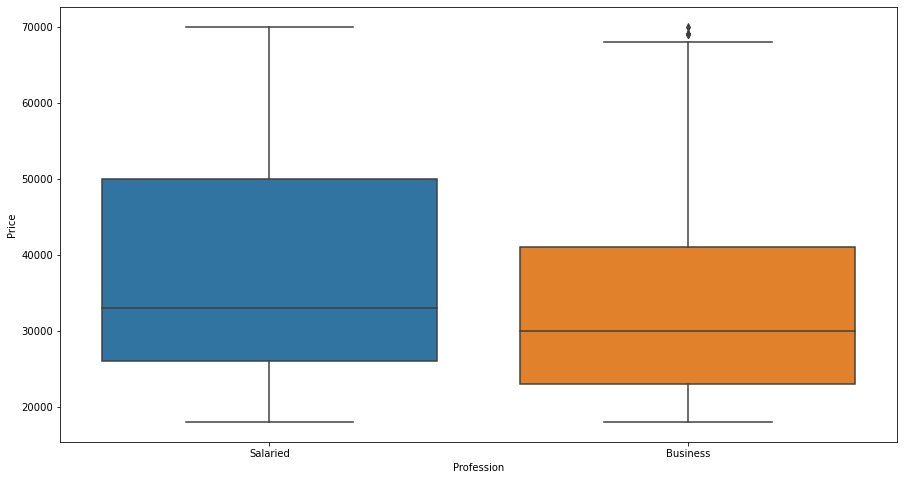

In [47]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x='Profession',y='Price')
plt.show()

- 75% of salary earners have cars priced 50000 and below. There is a wide range of variability in the prices of cars that salary earners own.
- 75% of Business owners have cars priced 42000 and below 

##### Educationvs Price vs Make

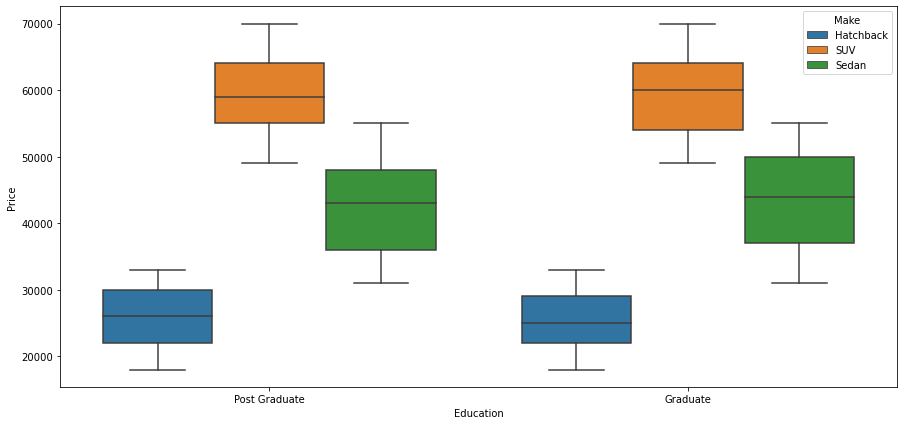

In [48]:
plt.figure(figsize=(15,7))
sns.boxplot(data= df,x='Education',y='Price',hue='Make')
plt.show()

##### Education vs Price

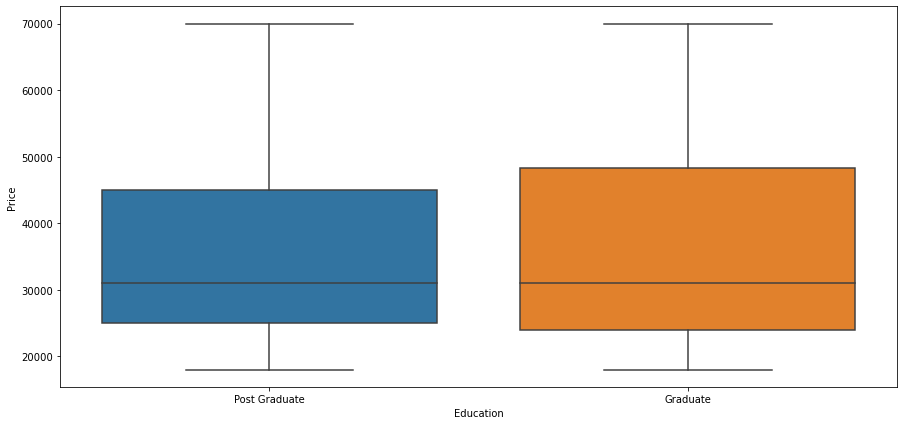

In [49]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='Education',y='Price')
plt.show()

- 50% of both graduates and post graduates have cars priced below 35000

##### Profession vs Price vs Education

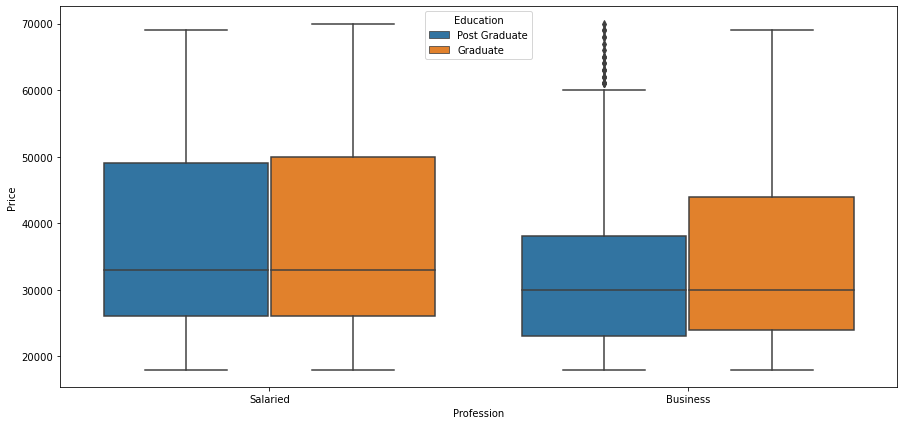

In [50]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='Profession',y='Price',hue='Education')
plt.show()

- Both Graduate and Post graduate degree holders own cars priced below 50000, there is also a wider range of variability between the prices of cars Salary Earners own compared to Business owners.



##### Gender vs Price vs Education

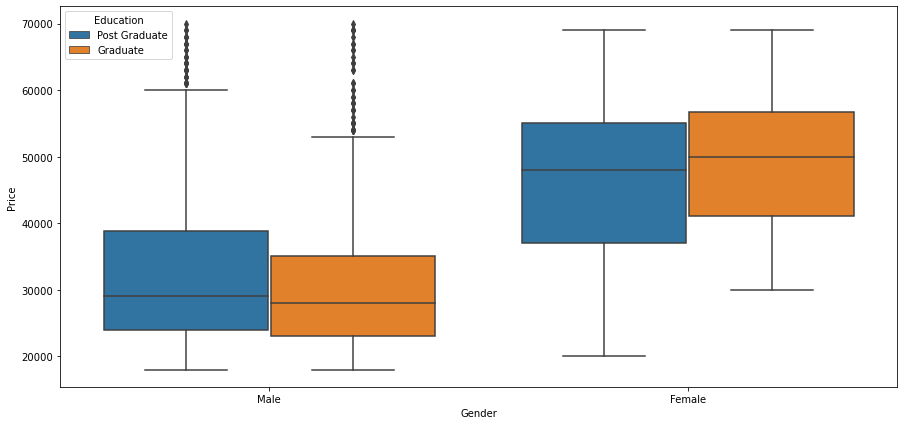

In [51]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='Gender',y='Price',hue='Education')
plt.show()

- There are more females(both graduate and post graduate degree holders) that own more expensive cars than males

##### Number of dependents vs price vs profession

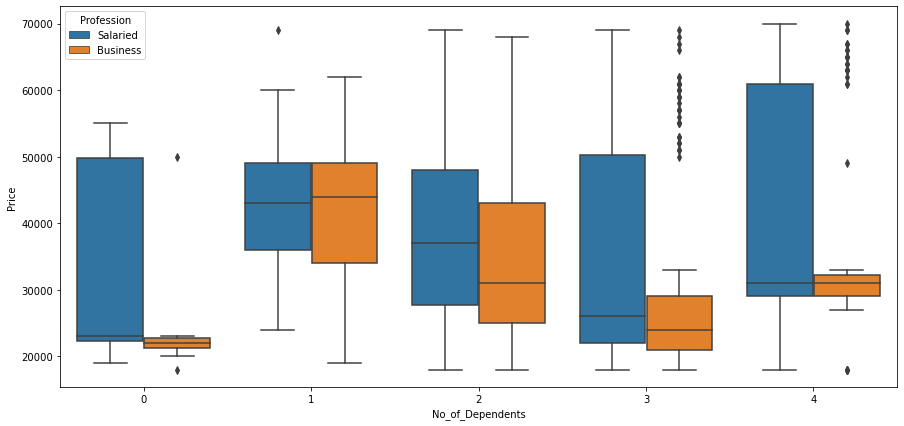

In [52]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='No_of_Dependents',y='Price',hue='Profession')
plt.show()

- In general, there is a wider range of variability among the salary earners across the various number of dependents

##### Age vs Price vs Make

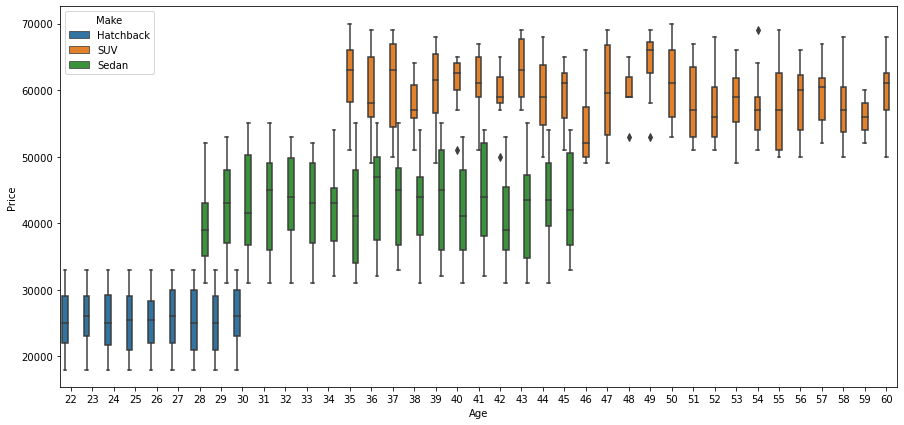

In [53]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='Age',y='Price',hue='Make')
plt.show()

- The most preferred car type for people between the ages 22 and 30years is Hatchback whose prices ranges from 18000 to 33000
- The most preferred car type for people between the ages 28 and 45years is Sedan whose prices ranges from 31000 to 55000
- The most preferred car type for people between the ages 35 and 60 years is SUV whose prices ranges from 49000 to 70000

##### Age vs  Price vs House loan

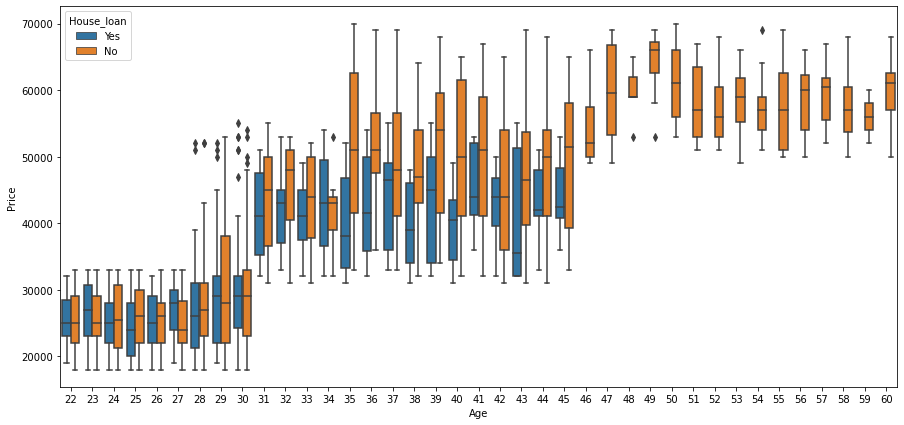

In [54]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='Age',y='Price',hue='House_loan')
plt.show()

- Car owners above 45 years did not take House loan
- 50% of Car owners between the ages 18-30 years took House loan while 50% of car owners did not take car loan. 
- 50% of car owners between the ages 31-45 years took House loan while 50% of car owners in that age range did not take a car loan 

#### Question 10: For customers who have 3 or fewer dependents, how does the average car price vary by profession? [2 marks]

In [55]:
few_dependents = df[df['No_of_Dependents']<=3]

few_dependents.groupby(['Profession'])['Price'].mean().sort_values(ascending = False).reset_index()

,Profession,Price
0,Salaried,37036.18
1,Business,32830.22


- The average car price for Business owners is 32830 while the average car price for salary earners is 37036.
- The average car price for salary earners is more than the average car price for Business owners

#### Question 11: For customers who have availed a home loan and a personal loan, how does the price vary by profession? [3 marks]

In [58]:
# filter data on those who have both House loan and Personal loan
filtered_loan = df[(df['House_loan']=='Yes') & (df['Personal_loan']=='Yes')]

# group by profession
grouped_data = filtered_loan.groupby('Profession')

price_stats = grouped_data['Price'].agg(['mean','median']).reset_index()

print(price_stats)

  Profession     mean   median
0   Business 30472.87 28000.00
1   Salaried 32463.09 30000.00


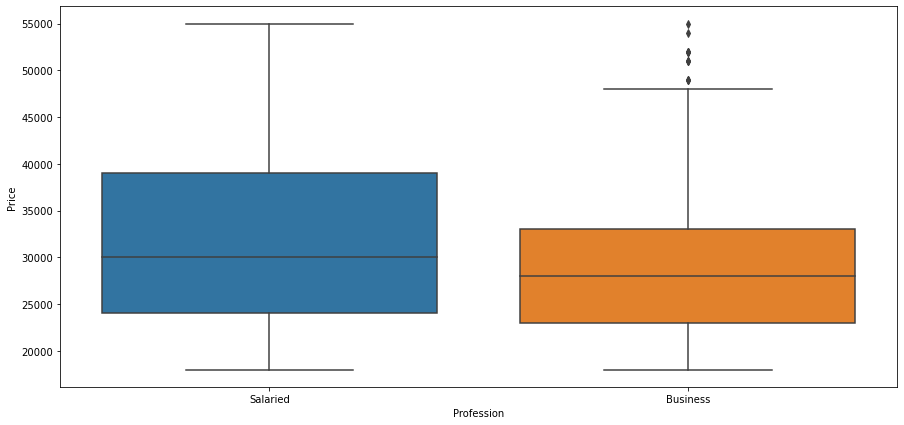

In [61]:
# plot a boxplot of Profession and Price
plt.figure(figsize=(15,7))
sns.boxplot(data=filtered_loan, x='Profession',y='Price')  
plt.show()

#### Observations:
- For customers who have both Home loan and Personal loan, the average price of cars for Salary earners have is greater than the average price of cars that Business owners use.

- There is a wider range of variability in the prices of cars Salary Earners own compared to the prices of cars Business Owners own.

## Conclusion and Recommendations

#### **Question 12:** Write the conclusions and business recommendations derived from the analysis. (6 marks)

**Conclusion**

**For Hatcback Car Type**

- The average age of Hatchback owners is 26 years.
- The age ranges from 22 years to 30 years.
- 98% of Hatchback owners are Males. 
- Majority of Hatchback owners are Business owners and Married.
- 62% of Hatchback owners are Post Graduate degree holders.
- The average salary of Hatchback owners is 54969. The salary ranges from 30000 to 80000.
- The average price of Hatchback cars is 25561. The minimum hatchback price is 18000 and the maximum hatchback price is 33000.

**For Sedan Car Type**

- The average age of Sedan car owners is 36 years. 
- The age of Sedan car owners ranges from 28 to 45 years.
- 56% of Sedan owners are Males.
- 62% of Sedan owners are Salary earners and Post Graduate degree holders.
- Majority of Sedan car owners are Married.
- 56% of Sedan owners have Personal loan.
- 61% of Sedan owners do not have House loan.
- 55% of Sedan owners have Partners working.
- The average salary of Sedan owners is 62213. The minimum salary is 35000 and the maximum salary is 85000.
- The average price of a Sedan car is 42672. The minimum price is 31000 and the maximum price is 55000.

**For SUV Car Type**

- The average age of SUV car owners is 48 years. 
- The age range of SUV car owners is between 35 years and 60 years.
- 52% of SUV car owners are Males.
- 70% of SUV owners are salary earners.
- Majority of SUV owners are Married.
- 60% of SUV owners are Post Graduate degree holders.
- Majority of SUV owners do not have Personal loan and House loan.
- 50% of SUV owners have partners working.
- The average salary of SUV owners is 72684. The salary of SUV owners ranges from 46000 to 90000.
- The average price of SUV cars is 59304. The minimum price of an SUV is 49000 and the maximum price of an SUV is 70000.


- People between the ages 22 and 30years prefer Hatchback  car type whose prices ranges from 18000 to 33000.
- People between the ages 28 and 45years Prefer Sedan car type whose prices ranges from 31000 to 55000.
- People between the ages 35 and 60 years prefer SUV car type whose prices ranges from 49000 to 70000.

**In General:**
- Hatchback car type is the most preferred car type.
- Majority of car owners are Males.
- 91% of car owners are Married .
- 62% of car owners are Post Graduate Degree Holders.
- 57% of car owners are Salary Earners.
- SUV car type are the most expensive cars followed by Sedan car type.
- Hatchback car type is the most affordable car type.


**Recommendations**
- Market Segmentation
 - Hatchback Cars
      - Target young adults aged 22-30 years, primarily males, who are business owners or salaried individuals.
      - Highlight affordability and practicality in marketing campaigns.
      - Emphasize features attractive to younger audiences such as fuel efficiency, compact size for city driving, and modern       design.
      - Leverage social media and digital marketing platforms popular with this age group.
      - Focus on producing models that are stylish yet affordable, with a price range of 18000 to 33000.
  
 - Hatchback Cars
     - Target mid-aged adults aged 28-45 years, a balanced mix of genders, primarily salaried individuals and post-graduates.
     - Emphasize comfort, reliability, and family-oriented features in marketing.
     - Highlight the value proposition for professionals who need a reliable car for both personal and professional use.
     - Utilize a mix of traditional and digital marketing, including professional networks and family-oriented platforms.
     - Focus on producing models with a balance of luxury and affordability, priced between 31000 and 55000.
     
 - SUV Cars
     - Target older adults aged 35-60 years, with a slight male dominance, mostly salaried individuals with higher income. levels.
     - Emphasize luxury, safety, and spaciousness in marketing campaigns.
    - Highlight features appealing to families and professionals who travel frequently.
    - Use traditional media, such as TV and print, along with digital marketing targeting higher-income demographics.
    - Focus on producing high-end, feature-rich models with a price range of 49000 to 70000.
    
- Brand Positioning
    - Position Hatchbacks as affordable, stylish, and practical for young professionals and first-time buyers.
    - Position Sedans as reliable, comfortable, and professional for mid-aged professionals and families.
    - Position SUVs as luxurious, spacious, and safe for affluent families and older professionals.
    
- Incentives
    - Offer discounts or incentives for trade-ins, especially for Hatchback buyers.
    




___